In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


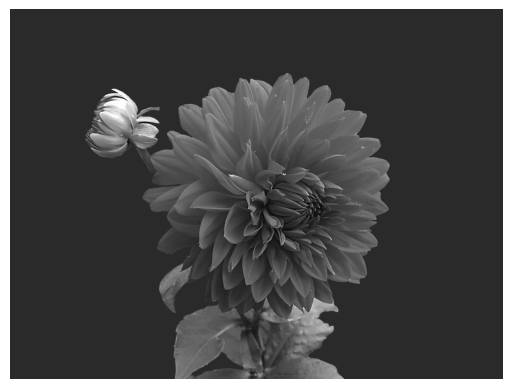

In [1]:
import cv2

# Specify the path to your image
image_path = 'C://Users//owner//Pictures//Saved Pictures//pexels-pixabay-60597.jpg'
from matplotlib import pyplot as plt
# Read the image in grayscale
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the grayscale image using matplotlib
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()


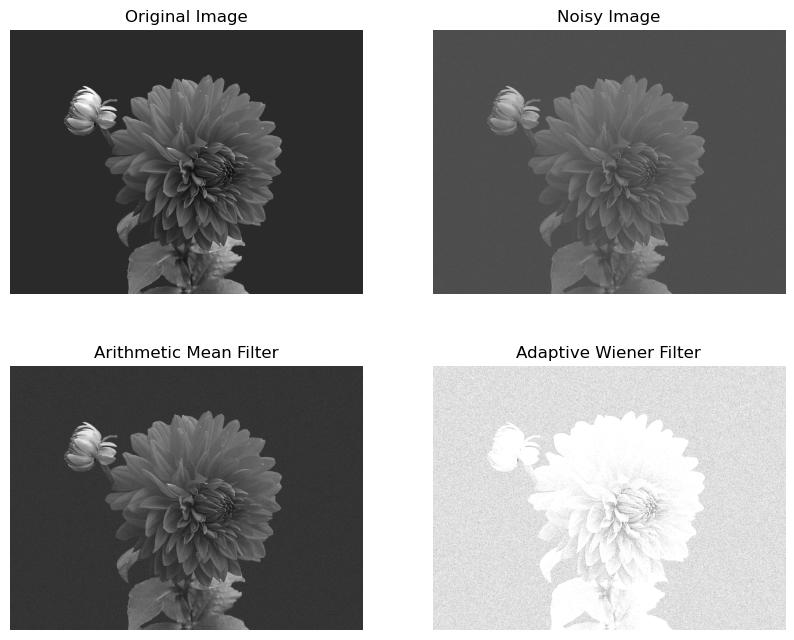

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, restoration
from skimage.morphology import disk  # Importing the disk function
# Function to add noise to an image
def add_noise(image, noise_type='gaussian', mean=0, sigma=25):
    if noise_type == 'gaussian':
        row, col = image.shape
        gauss = np.random.normal(mean, sigma, (row, col))
        noisy = image + gauss
        return noisy
    else:
        return image

# Function to apply arithmetic mean filter
def arithmetic_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

# Function to apply adaptive Wiener filter
def adaptive_wiener_filter(image, balance=0.1, psf_radius=1):
    # Convert image to float
    image = image.astype(float)

    # Create a disk-shaped PSF (you can modify this based on your needs)
    psf = disk(psf_radius)

    # Apply adaptive Wiener filter
    adaptive_wiener_result = restoration.wiener(image, psf, balance=balance)

    return adaptive_wiener_result
# Check if the image is loaded successfully
if gray_image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Add Gaussian noise to the image
    noisy_image = add_noise(gray_image, noise_type='gaussian', mean=0, sigma=25)

    # Apply arithmetic mean filter
    arithmetic_mean_result = arithmetic_mean_filter(noisy_image)

    # Apply adaptive Wiener filter
    adaptive_wiener_result = adaptive_wiener_filter(noisy_image, balance=0.1)

    # Display the results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Noisy Image')
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Arithmetic Mean Filter')
    plt.imshow(arithmetic_mean_result, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Adaptive Wiener Filter')
    plt.imshow(adaptive_wiener_result, cmap='gray')
    plt.axis('off')

    plt.show()
   

Text(0.5, 1.0, 'Sobel Threshold 2')

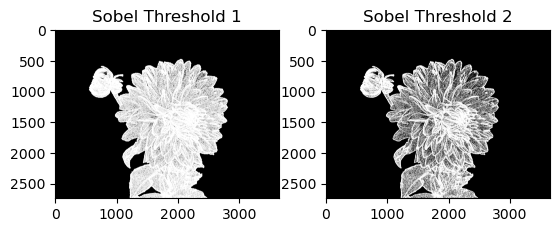

In [13]:
# Apply Sobel filter with different thresholds
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)

# Thresholding Sobel results
threshold_val_1 = 50
threshold_val_2 = 100
sobel_threshold_1 = np.uint8(np.sqrt(sobelx**2 + sobely**2) > threshold_val_1)
sobel_threshold_2 = np.uint8(np.sqrt(sobelx**2 + sobely**2) > threshold_val_2)

plt.subplot(2, 2, 1)
plt.imshow(sobel_threshold_1, cmap='gray')
plt.title('Sobel Threshold 1')

plt.subplot(2, 2, 2)
plt.imshow(sobel_threshold_2, cmap='gray')
plt.title('Sobel Threshold 2')
